# Cancer prediction

In [119]:
# Importing requried libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from collections import Counter

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, GridSearchCV


# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [120]:
#cancer

In [121]:
# loading data in dataframe

df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [122]:
df_cancer.shape

(569, 31)

In [123]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


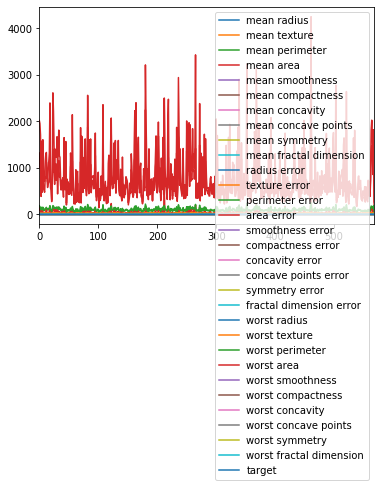

In [124]:
df_cancer.plot();

## Exploratory Data Analysis

We see that there are 30 features depending on which the target is predicted. Target 0 implies healthy and 1 implies cancer exists.

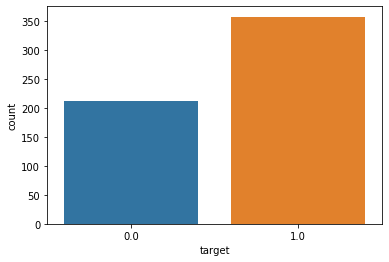

In [125]:
sns.countplot(df_cancer['target']);

Looking at the data there isn't a huge difference in the target classes and thus the data is considered almost balanced and there is no imbalance problem. However, one thing to be noted is that the size of the data is also small but we have a good sample of data.

## Visualizing features

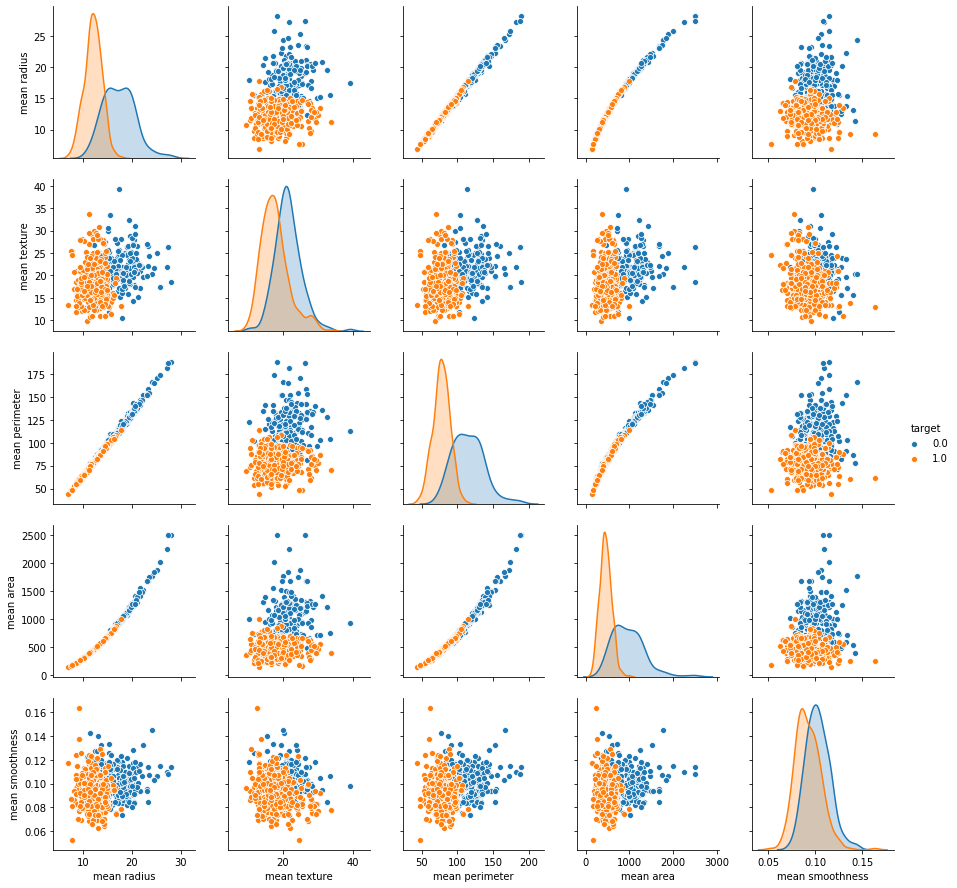

In [126]:
sns.pairplot(df_cancer, hue= 'target', vars= ['mean radius','mean texture','mean perimeter','mean area','mean smoothness']);

We are now visualizing just the first five features with respect to the target variable to see the common trend.
From the plot we could see that there is certain clear seperation of target classes for each variable and the trend looks linear to some extent.

## Checking for multi collinearity

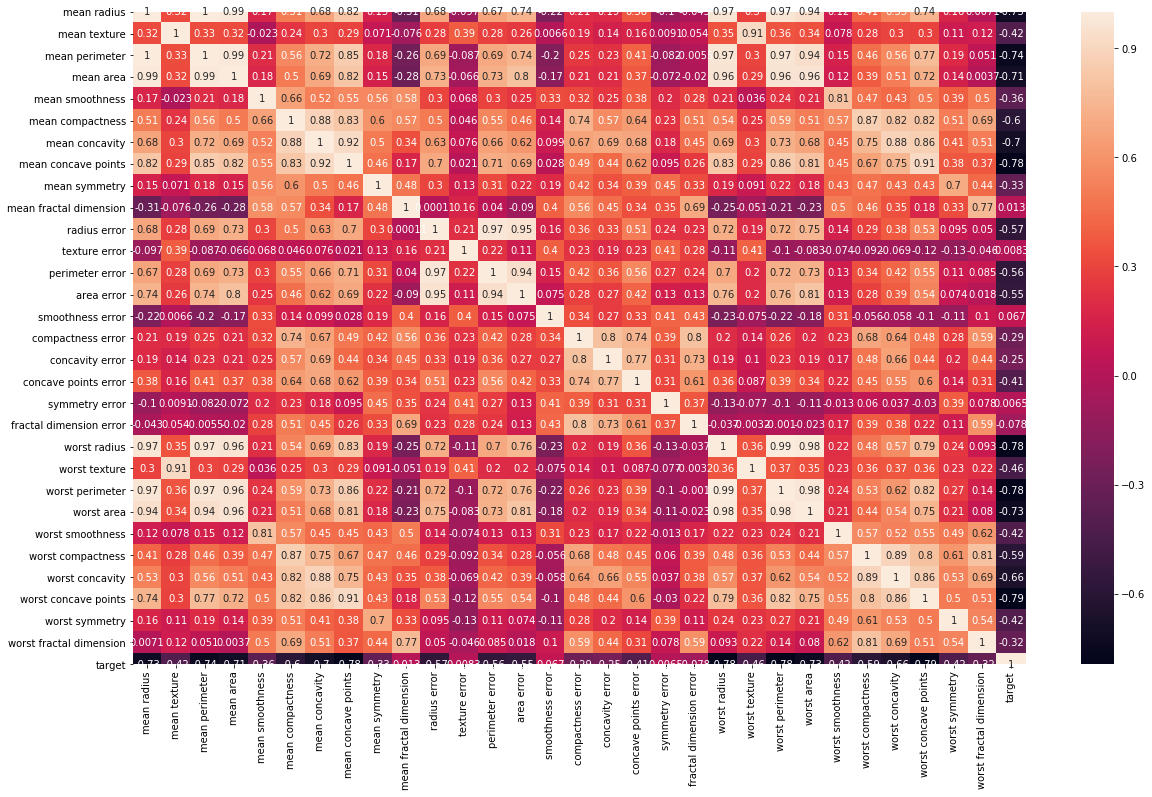

In [127]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.corr(),annot=True);

The above heat map shows that there are some very strong correlations between the features in the data.

## Model building

In [128]:
X = df_cancer.drop(['target'],axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [129]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [130]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=20)

In [131]:
print("X_train size:",X_train.shape)
print("X_test size:",X_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

X_train size: (455, 30)
X_test size: (114, 30)
y_train size: (455,)
y_test size: (114,)


In [132]:
# Creating a support vector classifier model
svc_model = SVC()

# Training the model
svc_model.fit(X_train,y_train)

# Predicting the model on our testdataset
y_predict = svc_model.predict(X_test)

In [133]:
y_predict_train = svc_model.predict(X_train)

In [134]:
print("Train accuracy:",accuracy_score(y_train,y_predict_train))
print("Test accuracy:",accuracy_score(y_test,y_predict))

Train accuracy: 0.9164835164835164
Test accuracy: 0.9298245614035088


In [135]:
y_predict

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.])

In [136]:
# Evaluating our model predictions

confusion_matrix_svc = pd.DataFrame(confusion_matrix(y_test,y_predict), index=['is_healthy','has_cancer'], columns=['predicted_healthy','predicted_cancer'])

In [137]:
confusion_matrix_svc

,predicted_healthy,predicted_cancer
is_healthy,40,8
has_cancer,0,66


In [138]:
print(Counter(y_test))
print(Counter(y_predict))

Counter({1.0: 66, 0.0: 48})
Counter({1.0: 74, 0.0: 40})


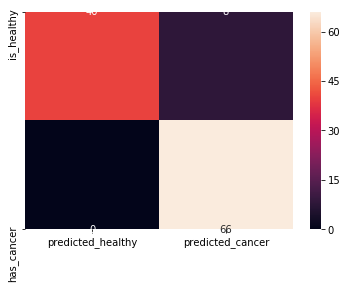

In [139]:
sns.heatmap(confusion_matrix_svc,annot=True);

In [140]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



We see that our SVM model is able to able to correctly classify the cancer and healthy patients with 93% accuracy.

Furthermore, we see that out of 66 women who has cancer, our model is able to successfully predicted them as having cancer and none of them are mis-classified. Hence, there is no Type 1 errors(False positives) found.

On the other hand, out of 48 healthy women, our model is able to successfully predict them as Healthy for 40 out of them and 8 of them are mis-classified to predicted to have cancer when they are not. Hence, we do have Type 2 errors(False negatives) found.

# Improving model

## Using MinMax Scaler

In [141]:
scaler_mm = MinMaxScaler()

In [142]:
X_train_norm = scaler_mm.fit_transform(X_train.astype(np.float))

In [143]:
X_test_norm = scaler_mm.transform(X_test.astype(np.float))

In [144]:
# Building SVC model with the scaled data
svc_model_mm = SVC()

svc_model_mm.fit(X_train_norm, y_train)

SVC()

In [145]:
y_predict_mm = svc_model_mm.predict(X_test_norm)

In [146]:
y_predict_mm

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.])

In [147]:
confusion_matrix_svc_mm = pd.DataFrame(confusion_matrix(y_test, y_predict_mm),index=['Is Healthy','Has Cancer'],columns=['Predicted Healthy','Predicted Cancer'])

In [148]:
confusion_matrix_svc_mm

,Predicted Healthy,Predicted Cancer
Is Healthy,47,1
Has Cancer,0,66


In [149]:
print(classification_report(y_test,y_predict_mm))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Using Standard Scaler

In [150]:
scaler_ss = StandardScaler()

In [151]:
X_train_ss = scaler_ss.fit_transform(X_train)
X_test_ss = scaler_ss.transform(X_test)

In [152]:
# Build SVC model with standardized data

svc_model_ss = SVC()

In [153]:
svc_model_ss.fit(X_train_ss,y_train)

SVC()

In [154]:
y_predict_ss = svc_model_ss.predict(X_test_ss)

In [155]:
y_predict_ss

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.])

In [156]:
confusion_matrix_svc_ss = pd.DataFrame(confusion_matrix(y_test,y_predict_ss),index=['Is Healthy', 'Has Cancer'],columns=['Predicted Healthy','Predicted Cancer'])

In [157]:
confusion_matrix_svc_ss

,Predicted Healthy,Predicted Cancer
Is Healthy,47,1
Has Cancer,0,66


In [158]:
print(classification_report(y_test,y_predict_ss))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Using Cross Validation

In [160]:
# K-fold Cross Validation

cv = KFold(n_splits=10, random_state=1, shuffle=True)

svc_model_cv = SVC()

In [162]:
scores_cv =[]

for train_index, test_index in cv.split(X):
#     print("Train Index:", train_index)
#     print("Test Index:", test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    svc_model_cv.fit(X_train, y_train)
    y_predict = svc_model_cv.predict(X_test)
    scores_cv.append(accuracy_score(y_test,y_predict))

In [116]:
print(scores_cv)

[0.9298245614035088, 0.8771929824561403, 0.9473684210526315, 0.9298245614035088, 0.8421052631578947, 0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.8392857142857143]


In [117]:
print(np.mean(scores_cv))

0.91375313283208


## Using Cross Validation with Min Max Scaler

In [118]:
print(X_train_norm.shape)
print(y_train.shape)

(455, 30)
(513,)


In [45]:
scores_cv_mm_kernel = []

for kernel in ['linear','poly','rbf']:
    svc_model_cv_mm = SVC(kernel=kernel)
    scaler_cv_mm = MinMaxScaler()

    scores_cv_mm = []

    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        X_train_cv_mm = scaler_cv_mm.fit_transform(X_train)
        X_test_cv_mm = scaler_cv_mm.transform(X_test)

        svc_model_cv_mm.fit(X_train_cv_mm, y_train)
        y_predit_cv_mm = svc_model_cv_mm.predict(X_test_cv_mm)

        scores_cv_mm.append(accuracy_score(y_test, y_predit_cv_mm))
        
    scores_cv_mm_kernel.append(np.mean(scores_cv_mm))

In [46]:
print(scores_cv_mm)

[1.0, 0.9473684210526315, 0.9473684210526315, 0.9824561403508771, 0.9473684210526315, 1.0, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9642857142857143]


In [47]:
print(np.mean(scores_cv_mm))

0.9736215538847116


In [48]:
scores_cv_mm_kernel

[0.9736215538847116, 0.9718671679197994, 0.9736215538847116]

In [50]:
# print("Train accuracy:",accuracy_score(y_train,y_predict_train))
# print("Test accuracy:",accuracy_score(y_test,y_predict))

## Using Cross Validation with Standard Scaler

In [51]:
svc_model_cv_ss = SVC()
scaler_cv_ss = StandardScaler()

scores_cv_ss = []

for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    X_train_cv_ss = scaler_cv_ss.fit_transform(X_train)
    X_test_cv_ss = scaler_cv_ss.transform(X_test)
    
    svc_model_cv_ss.fit(X_train_cv_ss, y_train)
    y_predit_cv_ss = svc_model_cv_ss.predict(X_test_cv_ss)
    
    scores_cv_ss.append(accuracy_score(y_test, y_predit_cv_ss))

In [52]:
print(scores_cv_ss)

[1.0, 0.9473684210526315, 0.9473684210526315, 0.9824561403508771, 0.9122807017543859, 1.0, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9642857142857143]


In [53]:
print(np.mean(scores_cv_ss))

0.9683583959899748


## LOOCV

- There's isn't a huge difference between the accuracy of the model and train and test data and thus no indication of overfitting. However, since we have very less data it is ideal to implement cross validation instead of the holdout method to utilize the most of the data.
- On the other hand, for the same reason of that we have less data let's implement LOOCV as it doesn't take more computational power and let's see if we get better results.

In [54]:
loocv = LeaveOneOut()

svc_model_loocv = SVC()

In [55]:
scores_loocv = []

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index], y.iloc[test_index]
    
    svc_model_loocv.fit(X_train, y_train)
    y_predict_loocv = svc_model_loocv.predict(X_test)
    
    scores_loocv.append(accuracy_score(y_test,y_predict_loocv))

In [56]:
print(scores_loocv)

[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0,

In [57]:
print(np.mean(scores_loocv))

0.9121265377855887


## LOOCV + MinMax Scaler

In [58]:
scaler_loocv_mm = MinMaxScaler()

scores_loocv = []

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index], y.iloc[test_index]
    
    X_train_mm = scaler_loocv_mm.fit_transform(X_train)
    X_test_mm = scaler_loocv_mm.transform(X_test)
    
    svc_model_loocv.fit(X_train_mm, y_train)
    y_predict_loocv = svc_model_loocv.predict(X_test_mm)
    
    scores_loocv.append(accuracy_score(y_test,y_predict_loocv))

In [59]:
print(np.mean(scores_loocv))

0.9753954305799648


# SVM Parameter optimization

In [171]:
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0,0.01,0.001,0.0001],
    'kernel':['linear','poly','rbf']
}

In [172]:
grid = GridSearchCV(SVC(),param_grid,verbose=4)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=20)

In [174]:
scaler_mm = MinMaxScaler()

In [175]:
X_train_mm = scaler_mm.fit_transform(X_train)

In [176]:
X_test_mm = scaler_mm.transform(X_test)

In [177]:
grid.fit(X_train_norm,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=

[CV 3/5] END .......................C=1, gamma=0, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=0, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=0, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 5/5] END ...............

[CV 4/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END .................C=1000, gamma=0, kernel=linear; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=1000, gamma=0, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=1000, gamma=0, kernel=poly; total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=0, kernel=poly; total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=0, kernel=poly; total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=0, kernel=poly; total time=   0.0s
[CV 1/5] END ....................C=1000, gamma=0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1000, gamma=0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=0, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=4)

In [178]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [179]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [180]:
y_predict = grid.predict(X_test_mm)

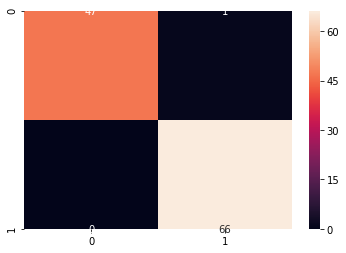

In [182]:
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True);

In [183]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

